# Heart Disease Prediction

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#importing dataset
dataset = pd.read_csv('Heart.csv')

In [ ]:
dataset.shape

(303, 14)

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3,0
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1,1
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3,0
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
63,41,1,1,135,203,0,1,132,0,0.0,1,0,1,1


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Features

In [62]:
info = ["age","1: male, 0:female","chest pain type, 1:typical angina, 2:atypical angina,3:non-anginal pain","4: asympomatic","resting blood pressure","serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]
for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0:female
cp:			chest pain type, 1:typical angina, 2:atypical angina,3:non-anginal pain
trestbps:			4: asympomatic
chol:			resting blood pressure
fbs:			serum cholestoral in mg/dl
restecg:			fasting blood sugar > 120 mg/dl
thalach:			resting electrocardiographic results (values 0,1,2)
exang:			 maximum heart rate achieved
oldpeak:			exercise induced angina
slope:			oldpeak = ST depression induced by exercise relative to rest
ca:			the slope of the peak exercise ST segment
thal:			number of major vessels (0-3) colored by flourosopy
target:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


##Analyzing Target variable

In [ ]:
dataset["target"].describe()

,target
count,303.000000
mean,0.544554
std,0.498835
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
dataset["target"].unique()

array([1, 0])

The target variable consist of 0 and 1 since it is a classification problem

###Checking Correlation Between Columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#ie Most of the columns are moderately correlated with target , but 'fbs' is very weakly correlated with target

## Exploratory Data Analysis (EDA)

target
1    165
0    138
Name: count, dtype: int64


<Axes: xlabel='target', ylabel='count'>

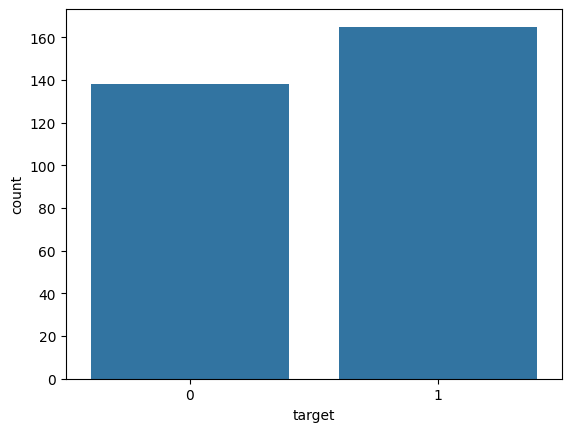

In [ ]:
import seaborn as sns
import pandas as pd

target_temp = dataset["target"].value_counts()
print(target_temp)

sns.countplot(data=dataset, x="target")

In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


Analyzing 'sex', 'cp','fbs','restecg','exang','slope','ca' and 'thal' features

## 1.Analyzing sex feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

<Axes: xlabel='sex', ylabel='target'>

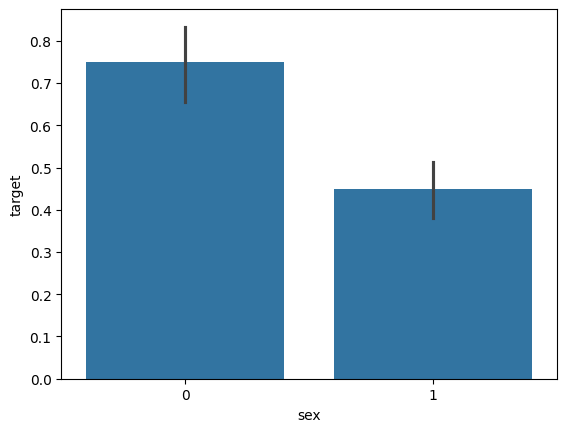

In [ ]:
sns.barplot(x="sex",y="target",data=dataset)

In [ ]:
# from the above plot it is known that females are more likely to have heart problem than males

## Analyzing chest Pain Type Feature

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0])

In [ ]:
#cp feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

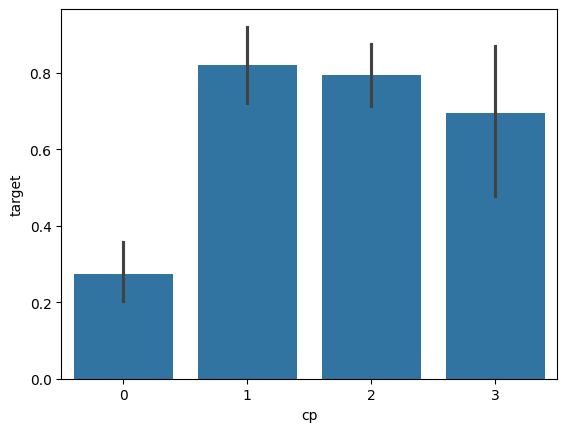

In [ ]:
sns.barplot(x=dataset["cp"],y=dataset["target"])

Chest pain of 0 , ie the one with typical angina are much less likely to have heart disease

## Analyzing FBS feature

In [ ]:
dataset["fbs"].unique()

array([1, 0])

<Axes: xlabel='fbs', ylabel='target'>

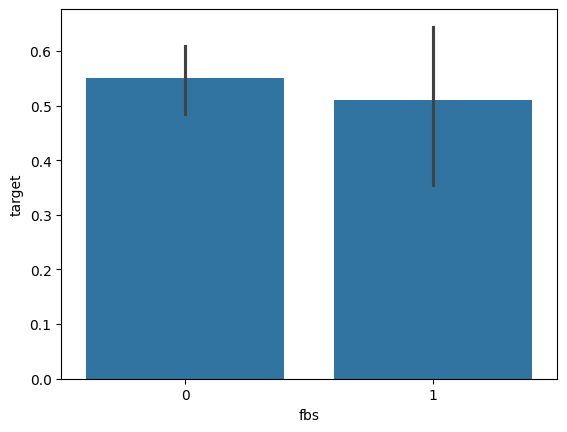

In [ ]:
sns.barplot(x=dataset["fbs"],y=dataset["target"])

## Analyzing the restecg feature

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

<Axes: xlabel='restecg', ylabel='target'>

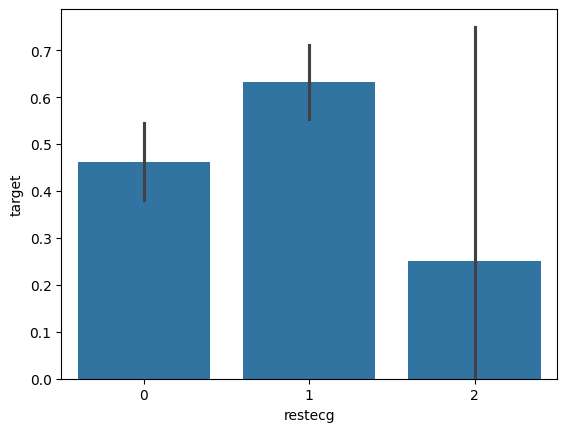

In [ ]:
sns.barplot(x=dataset["restecg"],y=dataset["target"])

People with restecg '1' and '0' are much more likely to have a heart disease than restec '2'

## Analyzing exang feature

In [ ]:
dataset["exang"].unique()

array([0, 1])

<Axes: xlabel='exang', ylabel='target'>

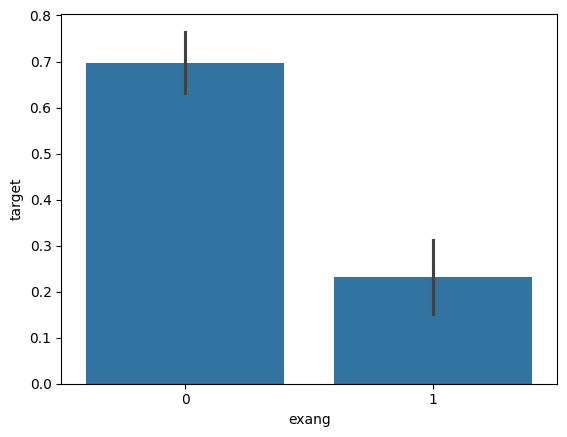

In [ ]:
sns.barplot(x=dataset["exang"],y=dataset["target"])

people with exang = 1 ,i.e Exercise induced angina are much less likely to have heart problems

##Analyzing the slope feature

In [ ]:
dataset["slope"].unique()

array([0, 2, 1])

<Axes: xlabel='slope', ylabel='target'>

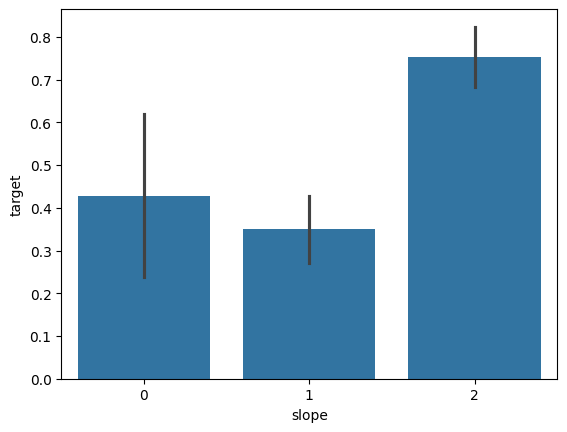

In [ ]:
sns.barplot(x=dataset["slope"],y=dataset["target"])

slope '2' causes heart pain much more than slope '0' and '1'

###Analyzing the ca feature

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<Axes: xlabel='ca', ylabel='count'>

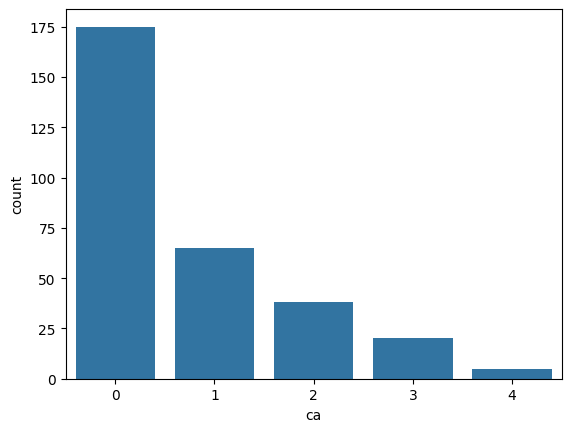

In [ ]:
sns.countplot(x=dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

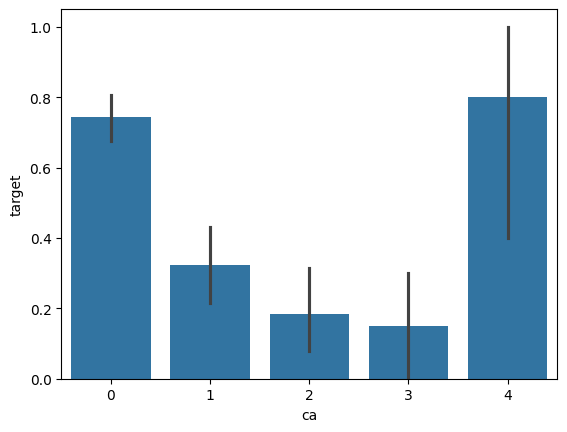

In [ ]:
sns.barplot(x=dataset["ca"],y=dataset["target"])

ca = 4 has astonishingly large number of heart patients

### Analyzing thal feature



In [ ]:
dataset.thal.unique()

array([1, 2, 3, 0])

<Axes: xlabel='thal', ylabel='target'>

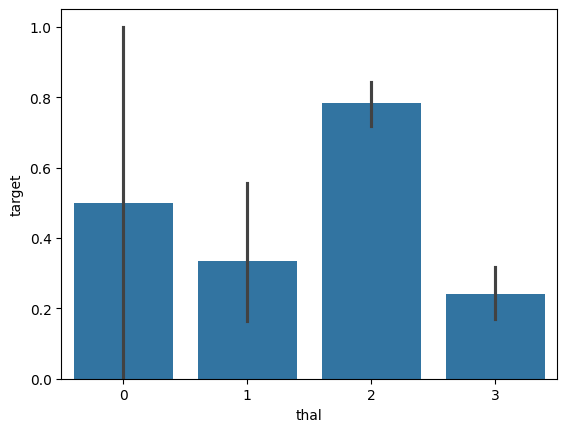

In [ ]:
sns.barplot(x=dataset["thal"],y=dataset["target"])

<ipython-input-35-a881bffaf3de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["thal"])


<Axes: xlabel='thal', ylabel='Density'>

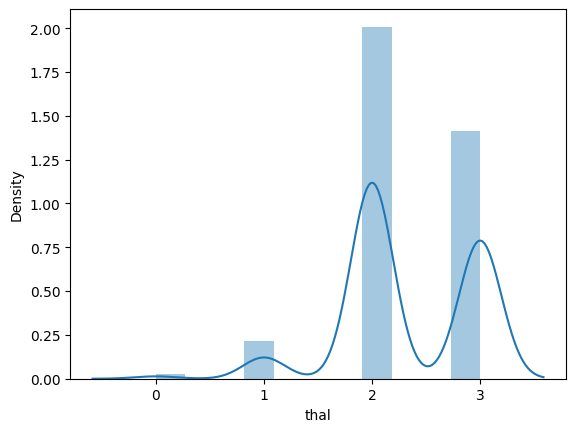

In [ ]:
sns.distplot(dataset["thal"])

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=10)

In [ ]:
X_train.shape

(242, 13)

In [ ]:
Y_test.shape

(61,)

# Model fitting

In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
Y_pred_lr = lr.predict(X_test)

In [ ]:
Y_pred_lr.shape

(61,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")


The accuracy score achieved using Logistic Regression is: 77.05 %


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)
Y_pred_nb = nb.predict(X_test)

Y_pred_nb.shape

(61,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 78.69 %


K Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,Y_train)
Y_pred_knn = knn.predict(X_test)

Y_pred_knn.shape


(61,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("the accuracy score achieved using KNN is: "+str(score_knn)+" %")

the accuracy score achieved using KNN is: 57.38 %


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
  dt = DecisionTreeClassifier(random_state=x)
  dt.fit(X_train,Y_train)
  Y_pred_dt = dt.predict(X_test)
  current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [ ]:
print(Y_pred_dt.shape)

(61,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy score achieved using Decision Tree is : "+str(score_dt)+"%")

The accuracy score achieved using Decision Tree is : 78.69%


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range (2000):
  rf = RandomForestClassifier(random_state=x)
  rf.fit(X_train,Y_train)
  Y_pred_rf = rf.predict(X_test)
  current_accuracy  = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [ ]:
Y_pred_rf.shape

(61,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The acccuracy score achieved using Decision Tree is :"+str(score_rf)+"%")

The acccuracy score achieved using Decision Tree is :83.61%


### SVM

In [ ]:
from sklearn import svm
sv = svm.SVC(kernel='linear') # Changed 'kernal' to 'kernel'

sv.fit(X_train,Y_train)
Y_pred_svm = sv.predict(X_test)

Y_pred_svm.shape

(61,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy score achieved using Linear SVM is :"+str(score_svm)+"%")

The accuracy score achieved using Linear SVM is :77.05%


# XGBOOST

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
Y_pred_xgb.shape

(61,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)
print("The accuracy score achieved using XGBoost is :"+str(score_xgb)+"%")

The accuracy score achieved using XGBoost is :78.69%


# Final comparison

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","KNN","Decision Tree","Support Vector Machine","Random Forest","XGBoost"]

for i in range(len(algorithms)):
  print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score achieved using Logistic Regression is: 77.05%
The accuracy score achieved using Naive Bayes is: 78.69%
The accuracy score achieved using KNN is: 77.05%
The accuracy score achieved using Decision Tree is: 57.38%
The accuracy score achieved using Support Vector Machine is: 78.69%
The accuracy score achieved using Random Forest is: 83.61%
The accuracy score achieved using XGBoost is: 78.69%


<Axes: xlabel='Algorithms', ylabel='Accuracy Score'>

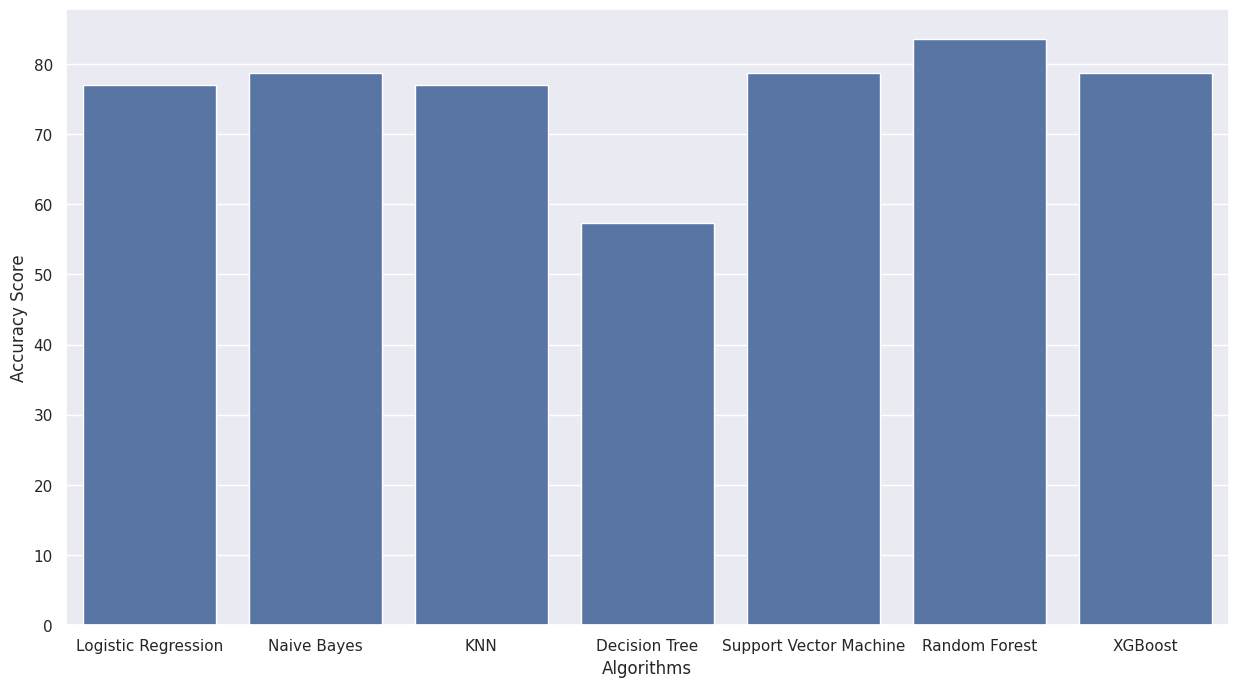

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
sns.barplot(x=algorithms,y=scores)

# Conclusion

### In this Heart Disease Prediction project,
##  Random Forest Yielded the Highest Accuracy of 83.61 %
##  SVM and XGBoost Achieved second highest Accuracy of 78.69%


